# Examine RadarSAT2 Archive for a particular location

# (GOOD!) Now that MDA is part of Maxar, it seems new and better search finally exists!
https://gsiportal.mdacorporation.com/gc_cp/#/map 

###### (BAD) full catalog search as of 10/2018:
https://www.eodms-sgdot.nrcan-rncan.gc.ca/index_en.jsp 


###### (BAD) old catalog search allows downloading csvs:
https://neodf.nrcan.gc.ca/neodf_cat3/index.php?lang=en#



In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from pandas.plotting import table
import matplotlib.dates as mdates

In [3]:
%matplotlib inline
#%qtconsole

In [4]:
pwd

'/Users/scott/Documents/GitHub/snowex/snowex2019'

In [5]:
ls /Users/scott/Documents/Research/Stereo2SWE/RS2/

boise-rs2-search.geojson  gm-rs2-search.geojson     grandmesa-aoi.geojson
boise-rs2-search.kml      gm-rs2-search.kml
gm-aoi.kml                gm-search.table


In [6]:
vectorFile = '/Users/scott/Documents/Research/Stereo2SWE/RS2/grandmesa-aoi.geojson'

# Grand mesa
Name_GM2ER1_092aa-RS2.csv

In [7]:
# Doesn't work so well.
#import fiona
#fiona.drvsupport.supported_drivers['kml'] = 'rw' 
#fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' 
#gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/gm-rs2-search.kml')
#gf.head()

In [8]:
gf = gpd.read_file('/Users/scott/Documents/Research/Stereo2SWE/RS2/gm-rs2-search.geojson')
gf.head()

Name                                        description  \
0  2018-11-12T01:14:54  \nGeoCenter Feature ID: d54b4558-524d-470e-844...   
1  2018-09-25T01:14:56  \nGeoCenter Feature ID: d6d24dc5-0f09-49dd-b30...   
2  2018-08-08T01:14:59  \nGeoCenter Feature ID: f79cca9a-23df-41d5-a8f...   
3  2018-07-05T01:06:42  \nGeoCenter Feature ID: 121a1137-dc78-4ed2-b3c...   
4  2018-06-28T01:10:49  \nGeoCenter Feature ID: 7e2b03f4-d361-4d54-bdd...   

  timestamp begin   end altitudeMode  tessellate  extrude  visibility  \
0      None  None  None         None          -1        0          -1   
1      None  None  None         None          -1        0          -1   
2      None  None  None         None          -1        0          -1   
3      None  None  None         None          -1        0          -1   
4      None  None  None         None          -1        0          -1   

  drawOrder  icon                                           geometry  
0      None  None  (POLYGON Z ((-109.6128405910373 39.64141105141...  
1      None  None  (POLYGON Z ((-109.6115178783751 39.64284069390...  
2      None  None  (POLYGON Z ((-109.6119248205888 39.64319471284...  
3      None  None  (POLYGON Z ((-107.6789394997203 40.23190800670...  
4      None  None  (POLYGON Z ((-108.647985667164 39.900007318093...

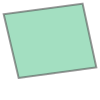

In [9]:
gf.Name.iloc[0]
gf.geometry.iloc[0]

In [10]:
# function to split description into columns

#test = gf.description.iloc[0]
kml2dict = {}
for i,entry in gf.iterrows():
    lines = entry.description.strip('\n').split('\n')
    attr = {}
    attr['Name'] = entry.Name
    attr['geometry'] = entry.geometry
    for line in lines:
        #print(line)
        k,v = line.split(': ')
        attr[k] = v

    
    kml2dict[i] = attr

In [11]:
gf = gpd.GeoDataFrame(kml2dict)
gf = gf.transpose()
gf['Path'] = gf['Relative Orbit Number'].astype(float).apply(int)
gf['Date'] = gf.Name.str[:10]
gf.head()

Absolute Orbit Number      Acquisition End Time    Acquisition Start Time  \
0           56959.10528  2018-11-12T01:15:13.073Z  2018-11-12T01:14:54.194Z   
1           56273.10528  2018-09-25T01:15:15.865Z  2018-09-25T01:14:56.971Z   
2           55587.10528  2018-08-08T01:15:17.939Z  2018-08-08T01:14:59.044Z   
3           55101.09852  2018-07-05T01:07:06.794Z  2018-07-05T01:06:42.631Z   
4           55001.09758  2018-06-28T01:11:13.758Z  2018-06-28T01:10:49.583Z   

    Beam Mode Beam Position                  GeoCenter Feature ID Image ID  \
0  Extra Fine         XF0W3  d54b4558-524d-470e-844a-62723c7a188c   679858   
1  Extra Fine         XF0W3  d6d24dc5-0f09-49dd-b30b-232f2dbb69b6   668566   
2  Extra Fine         XF0W3  f79cca9a-23df-41d5-a8fe-1b6e9901ee15   657093   
3  Extra Fine         XF0W3  121a1137-dc78-4ed2-b3ca-4c9b9e06e484   649222   
4  Extra Fine         XF0W3  7e2b03f4-d361-4d54-bdd5-8cce66bac84f   647637   

  Incidence Angle                 Name Polarization Relative Orbit Number  \
0       41.048817  2018-11-12T01:14:54           HH             128.10528   
1       41.055332  2018-09-25T01:14:56           HH             128.10528   
2       41.056004  2018-08-08T01:14:59           HH             128.10528   
3       40.974751  2018-07-05T01:06:42           HH             328.09852   
4       40.987511  2018-06-28T01:10:49           HH             228.09758   

  Scene Number Spacecraft Orientation Swath Direction  \
0            1                  RIGHT       Ascending   
1            1                  RIGHT       Ascending   
2            1                  RIGHT       Ascending   
3            3                  RIGHT       Ascending   
4            3                  RIGHT       Ascending   

                                            geometry  Path        Date  
0  (POLYGON Z ((-109.6128405910373 39.64141105141...   128  2018-11-12  
1  (POLYGON Z ((-109.6115178783751 39.64284069390...   128  2018-09-25  
2  (POLYGON Z ((-109.6119248205888 39.64319471284...   128  2018-08-08  
3  (POLYGON Z ((-107.6789394997203 40.23190800670...   328  2018-07-05  
4  (POLYGON Z ((-108.647985667164 39.900007318093...   228  2018-06-28

In [12]:
print('Total acquisitions:', len(gf))
print('Beam Mode:', gf['Beam Mode'].unique())
print('Beam Position:', gf['Beam Position'].unique())
print('Polarizations:', gf['Polarization'].unique())
print('Relative Orbits', gf['Path'].unique())
#print('Relative Orbits', gf['Relative Orbit Number'].unique())

Total acquisitions: 78
Beam Mode: ['Extra Fine' 'ScanSAR Wide']
Beam Position: ['XF0W3' 'SCWA']
Polarizations: ['HH' 'HH+HV']
Relative Orbits [128 328 228 192  92 292  49  28 335  85]


In [13]:
gf.keys()

Index(['Absolute Orbit Number', 'Acquisition End Time',
       'Acquisition Start Time', 'Beam Mode', 'Beam Position',
       'GeoCenter Feature ID', 'Image ID', 'Incidence Angle', 'Name',
       'Polarization', 'Relative Orbit Number', 'Scene Number',
       'Spacecraft Orientation', 'Swath Direction', 'geometry', 'Path',
       'Date'],
      dtype='object')

In [14]:
# Simple groupby beam mode counts
# Need to also sort by relative orbit number!
mode =  'Extra Fine'
#cols =  ['date','Scene Number', 'Swath Direction']
cols =  ['Date','Scene Number', 'Swath Direction', 'Path']
sort = ['Swath Direction','Path','Scene Number']
#gf[('Beam Mode' == 'Extra Fine')]
gf.loc[gf['Beam Mode'] == 'Extra Fine', cols].groupby(sort).count()

Date
Swath Direction Path Scene Number      
Ascending       128  1                7
                     2                9
                     3                9
                228  3                3
                328  3                3
Descending      92   1                5
                     2                8
                192  1                6
                     2                7
                292  1                5
                     2                6

In [15]:
# Extract particular path
#save = gf.loc[gf['Path'] == 128]
#save
#gf.keys()

In [16]:
# Rename to dinosar conventions
gf.rename(columns={"Date" : 'sceneDate', 
                "Path" : 'relativeOrbit', 
                "Swath Direction" : 'flightDirection',
                "Image ID" : 'sceneId',
                "Beam Mode" : 'opMode',
                "Beam Position" : 'beamNo',
                "Scene Number" : 'frame',
                "Incidence Anggle" : 'incidence',
                "Polarization" : 'polarization'}, 
         inplace=True)
#gf.to_file('query-alos2-dinosar.geojson', driver='GeoJSON')

In [17]:
# Plot these frames on a map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.img_tiles import GoogleTiles

In [18]:
def plot_map(gf, snwe, vectorFile=None, zoom=8, title='Orbital Footprints', tableFrame=None):
    pad = 1
    S, N, W, E = snwe
    plot_CRS = ccrs.PlateCarree()
    geodetic_CRS = ccrs.Geodetic()
    x0, y0 = plot_CRS.transform_point(W-pad, S-pad, geodetic_CRS)
    x1, y1 = plot_CRS.transform_point(E+pad, N+pad, geodetic_CRS)

    fig, ax = plt.subplots(figsize=(5, 5), dpi=150,
                           subplot_kw=dict(projection=plot_CRS))

    ax.set_xlim((x0, x1))
    ax.set_ylim((y0, y1))
    url = 'http://tile.stamen.com/terrain/{z}/{x}/{y}.png'
    tiler = GoogleTiles(url=url)
    # NOTE: going higher than zoom=8 is slow...
    ax.add_image(tiler, zoom)

    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='110m',
        facecolor='none')
    ax.add_feature(states_provinces, edgecolor='k', linestyle=':')
    ax.coastlines(resolution='10m', color='black', linewidth=2)
    ax.add_feature(cfeature.BORDERS)
    
    if type(tableFrame) == gpd.geodataframe.GeoDataFrame:
        table(ax, tableFrame, loc='top', zorder=10, fontsize=10,
          cellLoc='center', rowLoc='center',
          bbox=[0.1, 0.7, 0.6, 0.3]) 

    # Add region of interest polygon in specified
    if vectorFile:
        tmp = gpd.read_file(vectorFile)
        ax.add_geometries(tmp.geometry.values,
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor='m',
                          lw=2,
                          linestyle='dashed')

    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    for orbit, color in zip(orbits, colors):
        df = gf.query('relativeOrbit == @orbit')
        poly = df.geometry.cascaded_union

        if df.flightDirection.iloc[0] == 'ASCENDING':
            linestyle = '--'
            xpos, ypos = poly.centroid.x, poly.bounds[3]
        else:
            linestyle = '-'
            xpos, ypos = poly.centroid.x, poly.bounds[1]

        ax.add_geometries([poly],
                          ccrs.PlateCarree(),
                          facecolor='none',
                          edgecolor=color,
                          lw=2,
                          linestyle=linestyle)
        ax.text(xpos, ypos, orbit, color=color, fontsize=16, fontweight='bold',
                transform=geodetic_CRS)

    gl = ax.gridlines(plot_CRS, draw_labels=True,
                      linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    plt.title(title)
    plt.savefig('map.pdf', bbox_inches='tight')

In [19]:
def plot_timeline(gf, title='Acquisition Timeline'):
    """Plot dinosar inventory acquisitions as a timeline.

    Parameters
    ----------
    gf :  GeoDataFrame
        A geopandas GeoDataFrame

    """

    # Same colors as map
    orbits = gf.relativeOrbit.unique()
    colors = plt.cm.jet(np.linspace(0, 1, orbits.size))

    fig, ax = plt.subplots(figsize=(11, 8.5))
    plt.scatter(gf.timeStamp.values, gf.orbitCode.values,
                edgecolors=colors[gf.orbitCode.values], facecolors='None',
                cmap='jet', s=60, label='ALOS-2')

    plt.yticks(gf.orbitCode.unique(), gf.relativeOrbit.unique())

    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.legend(loc='lower right')
    plt.ylim(-1, orbits.size)
    plt.ylabel('Orbit Number')
    fig.autofmt_xdate()
    plt.title(title)
    plt.savefig('timeline.pdf', bbox_inches='tight')

In [20]:
def print_dates(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['date','dt']]

In [21]:
# Generate plots for all possible interferometric pairs (with dinosar naming scheme)
order = ["flightDirection", "opMode", "relativeOrbit", "frame", "beamNo"]
GF = gf.groupby(order).filter(lambda x: len(x["sceneId"]) > 2)
# Reprint summary as groupby object

w, s, e, n = GF.geometry.cascaded_union.bounds
snwe = [s, n, w, e]

GF.groupby(order)["sceneId"].count()

flightDirection  opMode      relativeOrbit  frame  beamNo
Ascending        Extra Fine  128            1      XF0W3     7
                                            2      XF0W3     9
                                            3      XF0W3     9
                             228            3      XF0W3     3
                             328            3      XF0W3     3
Descending       Extra Fine  92             1      XF0W3     5
                                            2      XF0W3     8
                             192            1      XF0W3     6
                                            2      XF0W3     7
                             292            1      XF0W3     5
                                            2      XF0W3     6
Name: sceneId, dtype: int64

In [22]:
GB = GF.groupby(order)["sceneId"]
print(GB.groups)

{('Ascending', 'Extra Fine', 128, '1', 'XF0W3'): Int64Index([0, 1, 2, 7, 12, 16, 21], dtype='int64'), ('Ascending', 'Extra Fine', 128, '2', 'XF0W3'): Int64Index([26, 33, 38, 41, 47, 60, 65, 69, 71], dtype='int64'), ('Ascending', 'Extra Fine', 128, '3', 'XF0W3'): Int64Index([25, 32, 37, 40, 46, 59, 64, 68, 70], dtype='int64'), ('Ascending', 'Extra Fine', 228, '3', 'XF0W3'): Int64Index([4, 11, 15], dtype='int64'), ('Ascending', 'Extra Fine', 328, '3', 'XF0W3'): Int64Index([3, 10, 13], dtype='int64'), ('Descending', 'Extra Fine', 92, '1', 'XF0W3'): Int64Index([9, 28, 49, 62, 67], dtype='int64'), ('Descending', 'Extra Fine', 92, '2', 'XF0W3'): Int64Index([8, 20, 27, 31, 36, 48, 61, 66], dtype='int64'), ('Descending', 'Extra Fine', 192, '1', 'XF0W3'): Int64Index([6, 24, 30, 45, 58, 73], dtype='int64'), ('Descending', 'Extra Fine', 192, '2', 'XF0W3'): Int64Index([5, 19, 23, 29, 35, 44, 57], dtype='int64'), ('Descending', 'Extra Fine', 292, '1', 'XF0W3'): Int64Index([18, 34, 39, 43, 72], dtyp

In [24]:
#inventory = GF.loc[indices]
#inventory.sceneDate.dtype

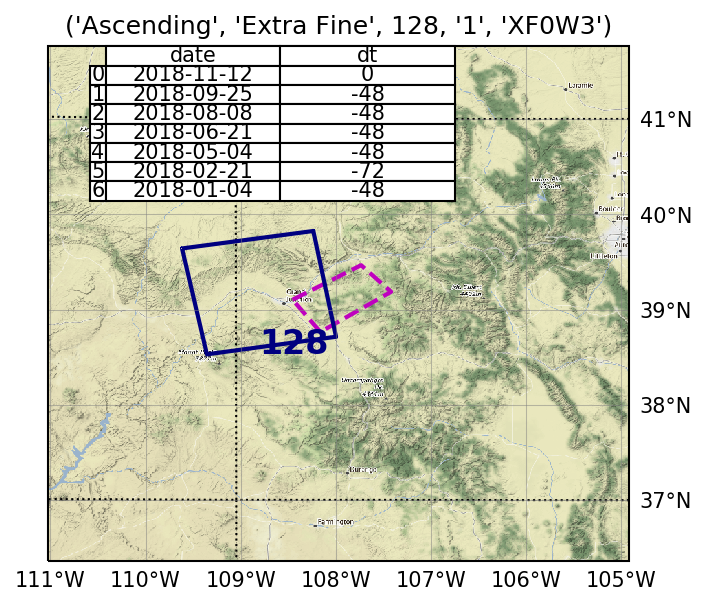

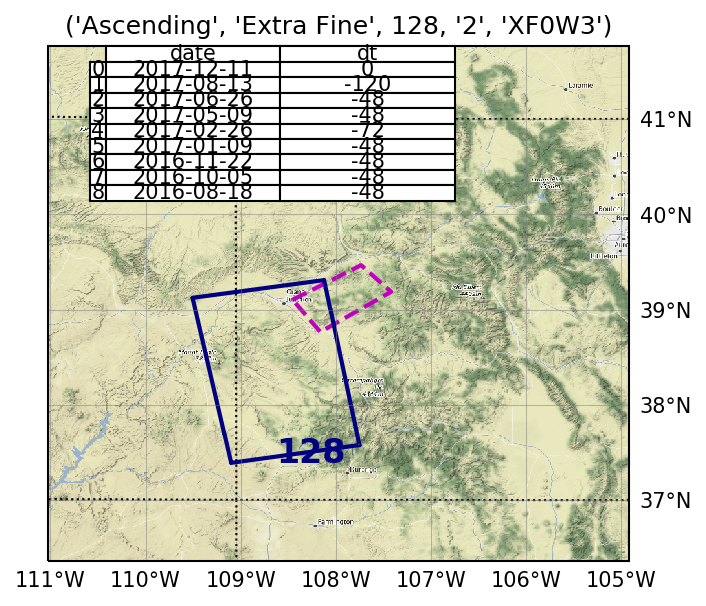

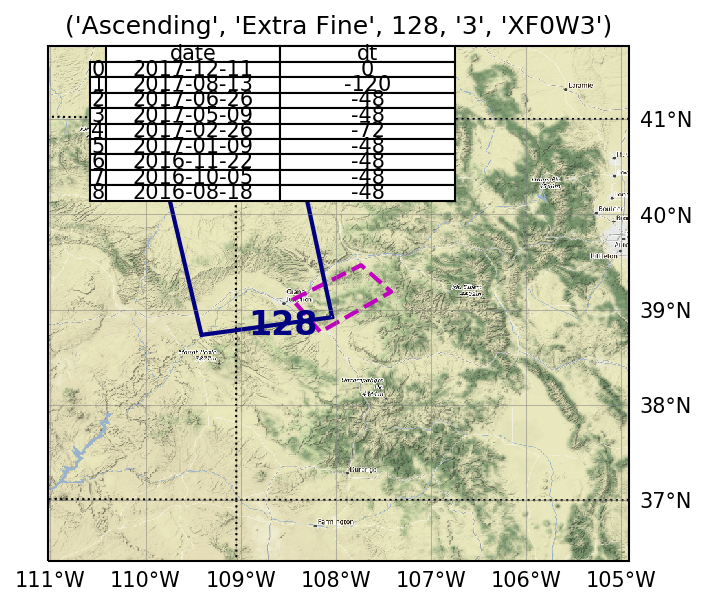

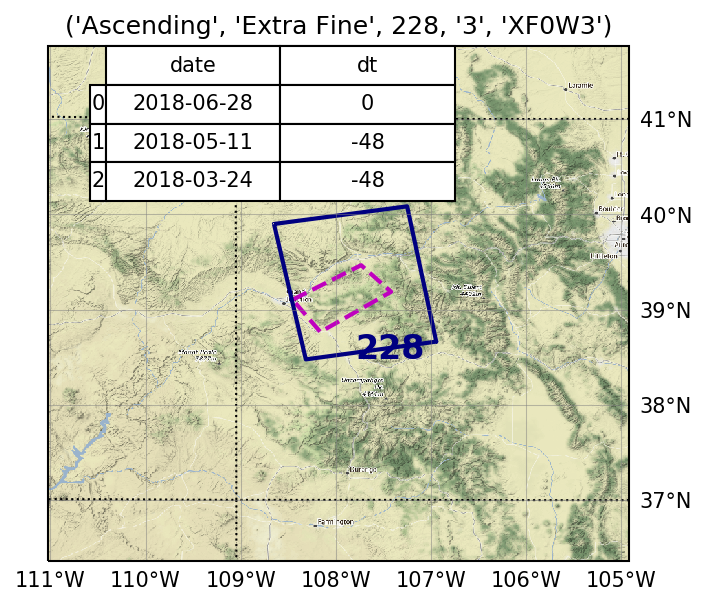

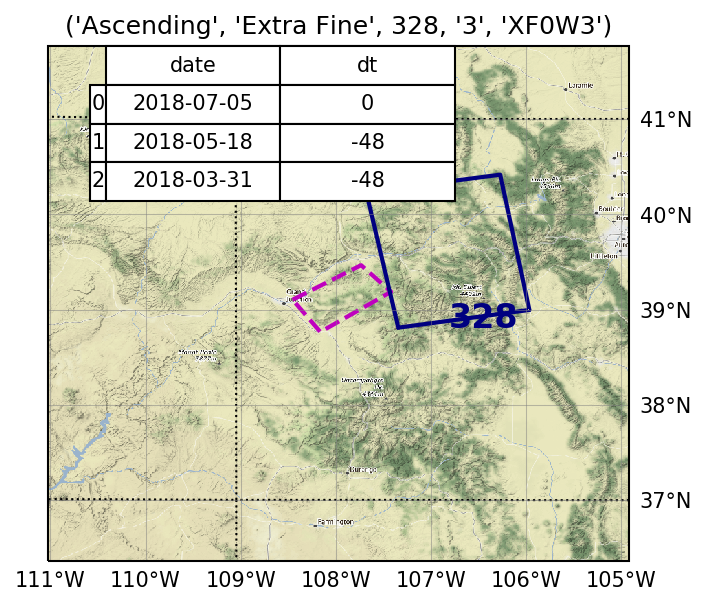

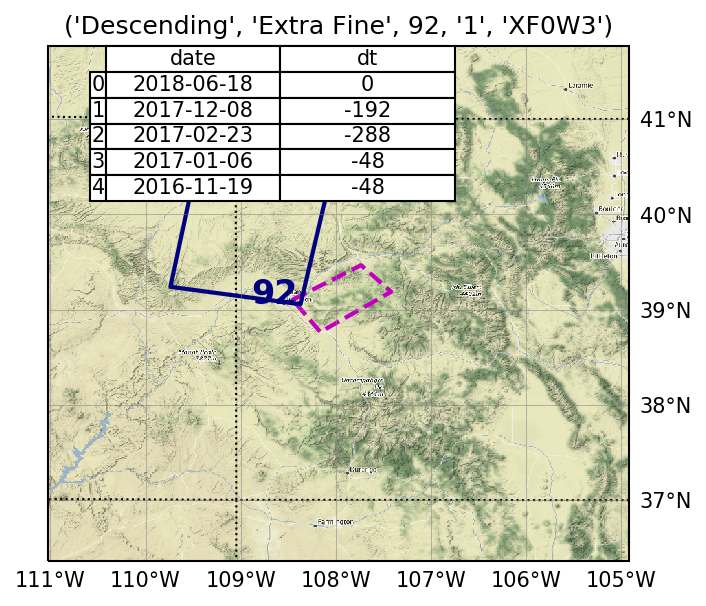

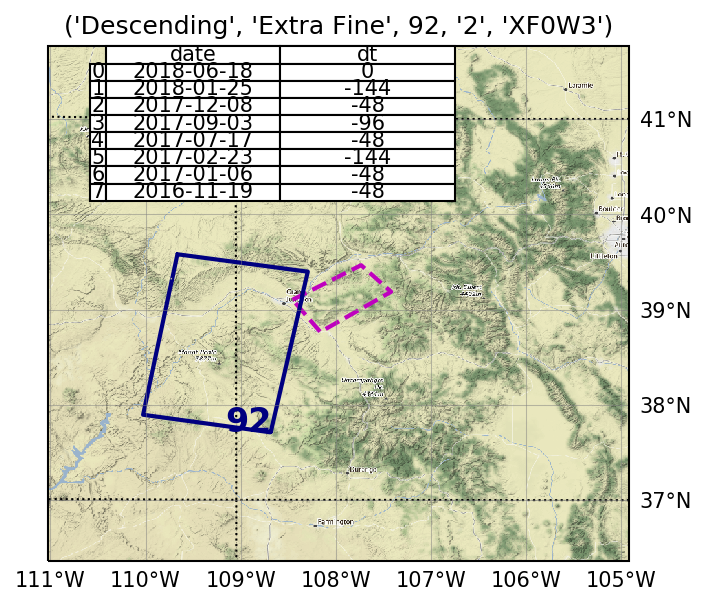

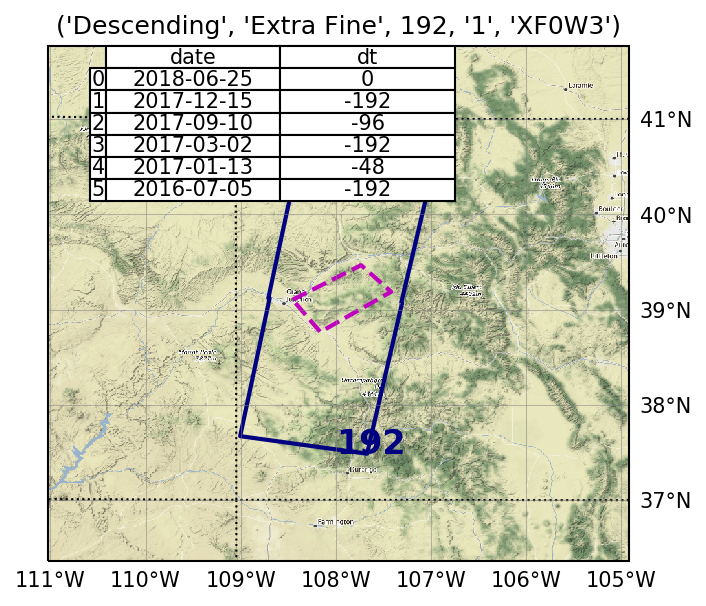

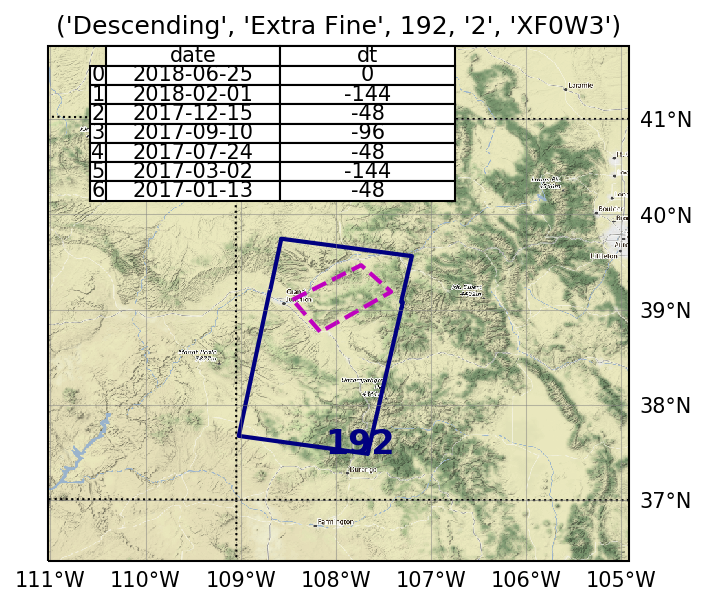

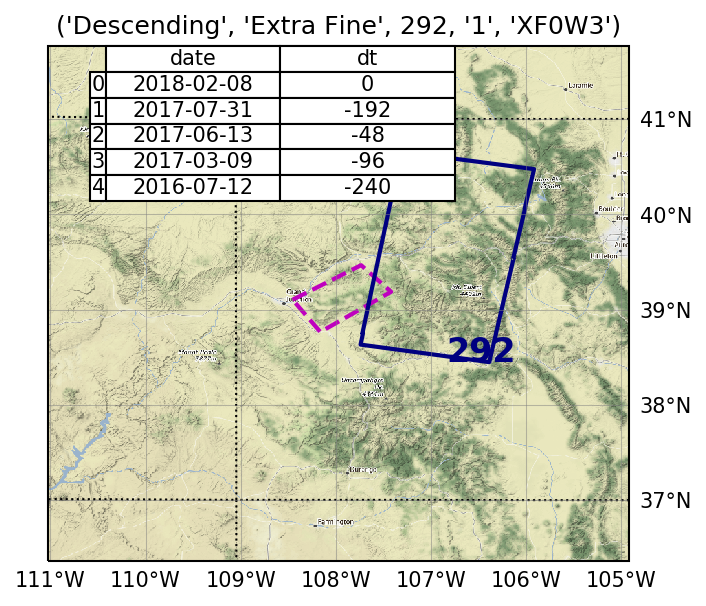

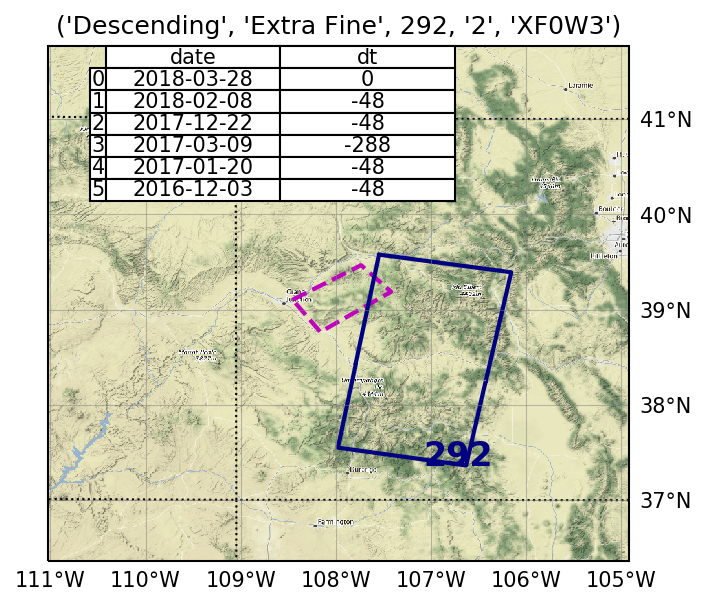

In [25]:
# Print maps for all combinations of possible interferometric pairs!
for labels, indices in GB.groups.items():
    #print(labels, indices)
    #print(labels, DF.loc[indices, "Scene ID"].tolist())
    inventory = GF.loc[indices]
    tmp = print_dates(inventory)
    plot_map(inventory, snwe, vectorFile, title=str(labels), tableFrame=tmp)

In [26]:
def print_inventory(GF):
    ''' print list of dates from dataframe'''
    tmp = GF.loc[:, ['sceneId','sceneDate']].reset_index(drop=True)
    tmp.loc[:, 'timeStamp'] = pd.to_datetime(tmp.sceneDate)
    tmp['date'] = tmp.sceneDate.str[:10]
    timeDeltas = tmp.timeStamp.diff()
    tmp['dt'] = timeDeltas.dt.days
    tmp.loc[0, 'dt'] = 0
    tmp['dt'] = tmp.dt.astype('i2')
    return tmp.loc[:, ['sceneId','date','dt']]

In [27]:
# Print maps for all combinations of possible interferometric pairs!
for labels, indices in GB.groups.items():
    print(labels)
    inventory = GF.loc[indices]
    tmp = print_inventory(inventory)
    print(tmp)

('Ascending', 'Extra Fine', 128, '1', 'XF0W3')
  sceneId        date  dt
0  679858  2018-11-12   0
1  668566  2018-09-25 -48
2  657093  2018-08-08 -48
3  645993  2018-06-21 -48
4  634758  2018-05-04 -48
5  619526  2018-02-21 -72
6  609248  2018-01-04 -48
('Ascending', 'Extra Fine', 128, '2', 'XF0W3')
  sceneId        date   dt
0  604348  2017-12-11    0
1  579744  2017-08-13 -120
2  568741  2017-06-26  -48
3  557913  2017-05-09  -48
4  541450  2017-02-26  -72
5  531011  2017-01-09  -48
6  520937  2016-11-22  -48
7  509874  2016-10-05  -48
8  499224  2016-08-18  -48
('Ascending', 'Extra Fine', 128, '3', 'XF0W3')
  sceneId        date   dt
0  604348  2017-12-11    0
1  579744  2017-08-13 -120
2  568741  2017-06-26  -48
3  557913  2017-05-09  -48
4  541450  2017-02-26  -72
5  531011  2017-01-09  -48
6  520937  2016-11-22  -48
7  509874  2016-10-05  -48
8  499224  2016-08-18  -48
('Ascending', 'Extra Fine', 228, '3', 'XF0W3')
  sceneId        date  dt
0  647637  2018-06-28   0
1  636323  2